## Import thư viện

In [20]:
import pandas as pd
import numpy as np
import collections as co
import statistics as st

from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

from matplotlib import ticker
import matplotlib.pyplot as plt


## Đọc dữ liệu từ file

In [21]:
df = pd.read_csv('E:\Learn\Bussiness Analyst\IS403.N21.HTTT_Nhom13\Dataset\CTLT.csv')


In [22]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,30.860001,31.260000,30.240000,30.910000,30.910000,1201700
1,2019-01-03,30.660000,30.660000,29.290001,29.840000,29.840000,1149900
2,2019-01-04,30.049999,31.360001,29.940001,31.080000,31.080000,3530400
3,2019-01-07,31.020000,32.180000,30.850000,32.000000,32.000000,1063400
4,2019-01-08,32.340000,33.060001,32.150002,32.790001,32.790001,1391000
...,...,...,...,...,...,...,...
1079,2023-04-17,46.009998,49.860001,42.529999,45.430000,45.430000,14629300
1080,2023-04-18,45.200001,45.375000,41.509998,42.080002,42.080002,10057000
1081,2023-04-19,41.419998,43.669998,41.330002,43.070000,43.070000,6744900
1082,2023-04-20,42.660000,44.410000,42.259998,44.400002,44.400002,3464300


## Phân tích dữ liệu

In [23]:
print("Information of Close Price")
print("Number Of Lines: ", len(df.Close))
print(f"Maximum: {max(df.Close)}")
print(f"Minimum: {min(df.Close)}")
print(f"Average: {st.mean(df.Close)}")
print(f"Median: {st.median(df.Close)}")

freq_table = co.Counter(df.Close)
max_freq = max(freq_table.values())
mode_values = [k for k, v in freq_table.items() if v == max_freq]
print("Mode: ", mode_values)

quantile = [np.percentile(df.Close, 25), np.percentile(df.Close, 50), np.percentile(df.Close, 75)]
print("Quantile: ", quantile)

print("Variance: ", st.variance(df.Close))
print("Standard deviation: ", st.stdev(df.Close))
print("Coefficient of Variation: ", st.stdev(df.Close))
print("Coefficient of Skewness: ", df.Close.skew())
print("Coefficient of Kurtosis: ", df.Close.kurtosis())

Information of Close Price
Number Of Lines:  1084
Maximum: 142.350006
Minimum: 29.84
Average: 81.36008313284132
Median: 83.505001
Mode:  [51.599998, 48.630001, 109.610001]
Quantile:  [52.2475005, 83.505001, 106.45000225000001]
Variance:  873.4248394348966
Standard deviation:  29.553761849126698
Coefficient of Variation:  29.553761849126698
Coefficient of Skewness:  0.10759095239193849
Coefficient of Kurtosis:  -1.317622277921274


### Trực quan hóa dữ liệu

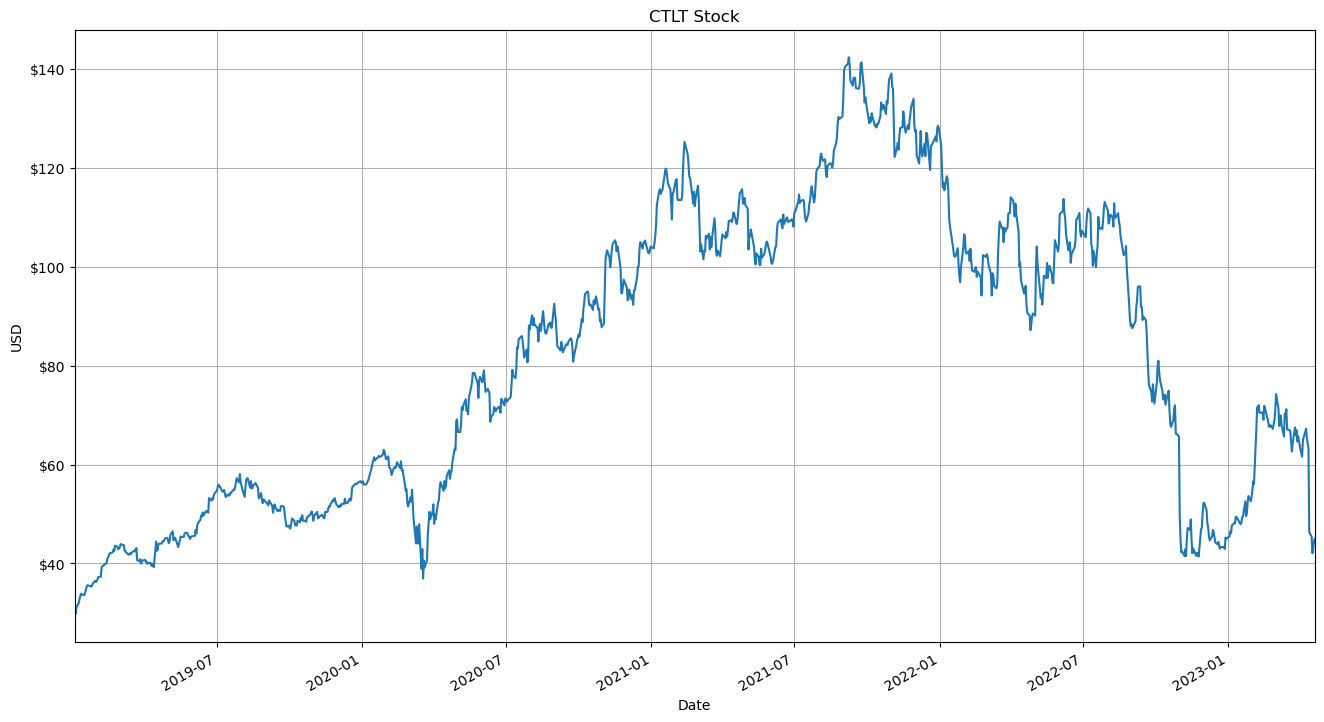

In [24]:
# Chuyển đổi kiểu dữ liệu của cột Date sang datetime64
df['Date'] = pd.to_datetime(df['Date'])

# Đặt cột Date làm index của DataFrame
df.set_index('Date', inplace=True)

# Thư viện vẽ đồ thị
formatter = ticker.StrMethodFormatter('${x:,.0f}')
title = 'CTLT Stock'
ylabel = 'USD'
xlabel = 'Date'

# Vẽ biểu đồ theo index của DataFrame
ax = df['Close'].plot(figsize=(16, 9), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)

# Hiển thị biểu đồ
plt.show()

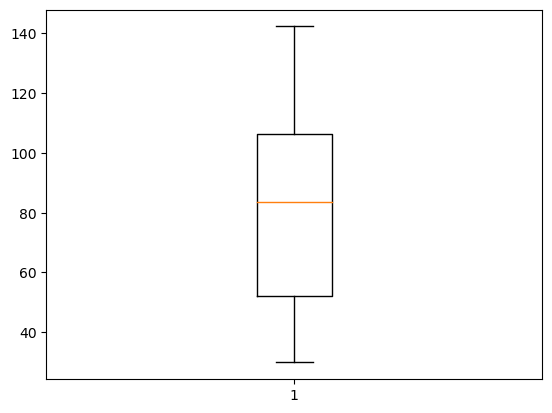

In [25]:
plt.boxplot(df.Close)
plt.show()

## Xây dựng mô hình

### Xử lý dữ liệu

In [26]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

### Chia tập train, test, validation

In [27]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [28]:
# Reshape lại dữ liệu
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
X_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

### Định nghĩa model

In [29]:
!pip install pmdarima

In [30]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3051.703, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3053.702, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3053.702, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3053.220, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3053.455, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.243 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [31]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [32]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[124.61361755 124.7372371  124.86085664 124.98447619 125.10809574
 125.23171529 125.35533484 125.47895439 125.60257393 125.72619348
 125.84981303 125.97343258 126.09705213 126.22067168 126.34429122
 126.46791077 126.59153032 126.71514987 126.83876942 126.96238896
 127.08600851 127.20962806 127.33324761 127.45686716 127.58048671
 127.70410625 127.8277258  127.95134535 128.0749649  128.19858445]


In [33]:
# 7. Đánh giá độ chính xác validate, test
# Độ lỗi mô hình trên tập test
test_mae = mean_absolute_error(y_pred, y_test)
test_mape = mean_absolute_percentage_error(y_pred, y_test)
test_mse = mean_squared_error(y_pred, y_test)
test_rmse = np.sqrt(test_mse)

print(f"Testing MAE: ", test_mae)
print(f"Testing MAPE: ", test_mape)
print(f"Testing MSE: ", test_mse)
print(f"Testing RMSE: ", test_rmse)



Testing MAE:  41.16665410187675
Testing MAPE:  0.2924509159414328
Testing MSE:  2160.408895241056
Testing RMSE:  46.48019895870774


Validation RMSE: 75.88863631701084
Testing RMSE: 46.48019895870774


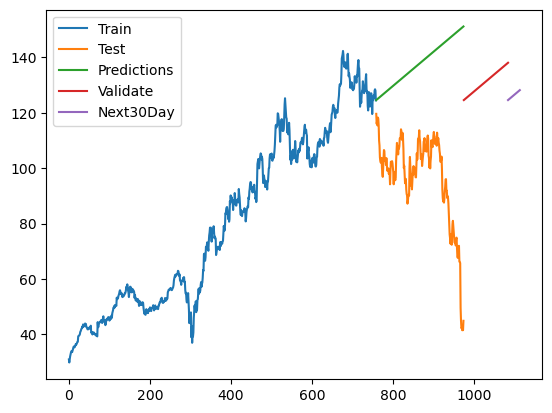

In [34]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [35]:
test_data.index

RangeIndex(start=758, stop=974, step=1)